# Imports

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load data

In [2]:
df = pd.read_csv('custom_dataset.csv', index_col=0)
df.dropna()
print(df.shape)

(4096, 3)


In [3]:
df.sample(5)

,feature_1,feature_2,target
2338,-0.554622,0.997458,0
285,-0.633636,0.333157,0
402,-0.302173,1.237529,0
744,1.831272,-0.399456,1
1705,1.478419,0.242265,1


Отрисуем выборку

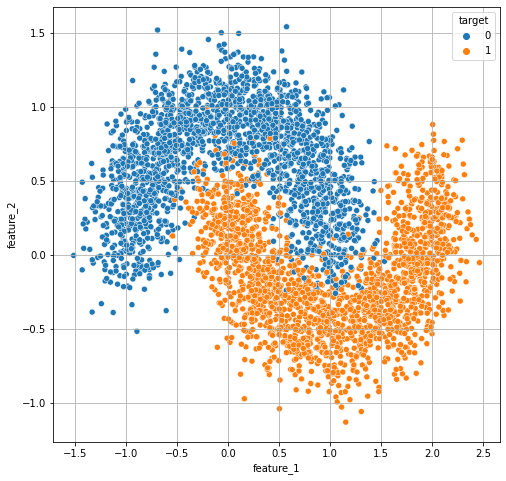

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='target')
plt.grid()
plt.show()

Понятно, что в исходном пространстве признаков выборки линейно не разделимы. Не будем плодить новые признаки и придумывать ядро, а просто покажем неприменимость SVM к этой задаче.

# Task 1. SVM

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[['feature_1','feature_2']].values, df['target'].values, test_size=0.33, random_state=42)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
cls = SVC(kernel='linear')
cls.fit(X_train, y_train)

SVC(kernel='linear')

Определим разделяющую полосу

In [26]:
cls.coef_, cls.intercept_

(array([[ 0.74616976, -1.43236814]]), array([0.031877]))

In [47]:
x_ = np.linspace(-3, 3)
y_ = (- cls.coef_[0][0] * x_ - (cls.intercept_[0])) / cls.coef_[0][1]
margin = 1.0 / np.sqrt(np.sum(cls.coef_ ** 2))

k = - cls.coef_[0][0] / cls.coef_[0][1]
lower_bound = y_ - np.sqrt(1 + k ** 2) * margin
upper_bound = y_ + np.sqrt(1 + k ** 2) * margin

print('Ширина полосы: ', margin)

Ширина полосы:  0.6191686016783546


In [67]:
y_pred = cls.predict(X_test)

mask_tp = (y_pred == 1) & (y_test == 1)
mask_tn = (y_pred == 0) & (y_test == 0)
mask_fp = (y_pred == 1) & (y_test == 0)
mask_fn = (y_pred == 0) & (y_test == 1)

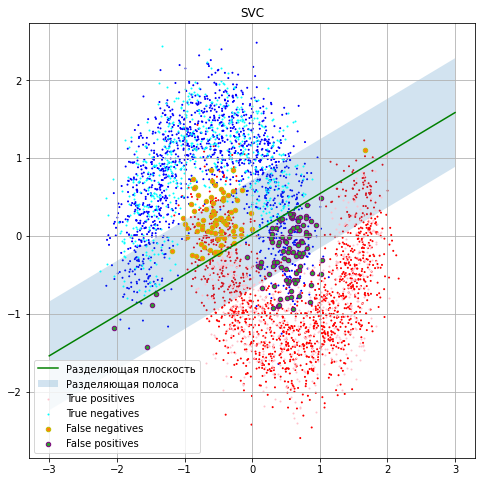

In [68]:
tr_colors = np.where(y_train == 0, 'blue', 'red')

plt.figure(figsize=(8, 8))
plt.title('SVC')
plt.scatter(X_train[:, 0], X_train[:, 1], c=tr_colors, s=1)

plt.plot(x_, y_, ls='-', label='Разделяющая плоскость', c='green')
plt.fill_between(x_, lower_bound, upper_bound, alpha=0.2, label='Разделяющая полоса')

plt.scatter(X_test[mask_tp, 0], X_test[mask_tp, 1], label='True positives', c='pink', s=1)
plt.scatter(X_test[mask_tn, 0], X_test[mask_tn, 1], label='True negatives', c='cyan', s=1)
plt.scatter(X_test[mask_fn, 0], X_test[mask_fn, 1], label='False negatives', edgecolors='y', s=20)
plt.scatter(X_test[mask_fp, 0], X_test[mask_fp, 1], label='False positives', edgecolors='purple', s=20)
plt.legend()
plt.grid()
plt.show()

In [60]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)


def classification_report(y_true, y_pred):
    print(f'Accuracy: \t{accuracy_score(y_true, y_pred)}')
    print(f'Precision:\t{precision_score(y_true, y_pred)}')
    print(f'Recall:   \t{recall_score(y_true, y_pred)}')
    print(f'F1-score: \t{f1_score(y_true, y_pred)}')
    

classification_report(y_test, y_pred)

Accuracy: 	0.8764792899408284
Precision:	0.8637037037037038
Recall:   	0.8860182370820668
F1-score: 	0.8747186796699173


# Task 2. kNN classifier

In [63]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)

mask_tp = (y_pred_knn == 1) & (y_test == 1)
mask_tn = (y_pred_knn == 0) & (y_test == 0)
mask_fp = (y_pred_knn == 1) & (y_test == 0)
mask_fn = (y_pred_knn == 0) & (y_test == 1)

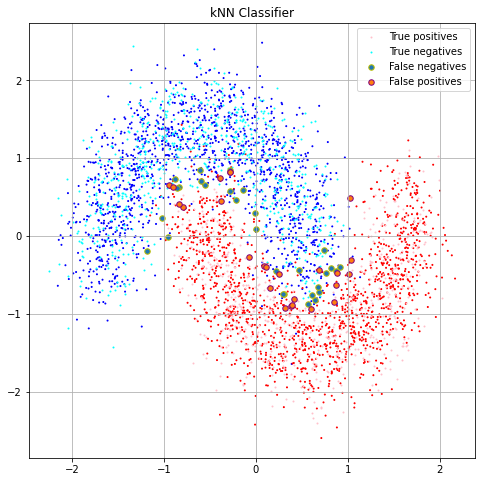

In [65]:
tr_colors = np.where(y_train == 0, 'blue', 'red')

plt.figure(figsize=(8, 8))
plt.title('kNN Classifier')
plt.scatter(X_train[:, 0], X_train[:, 1], c=tr_colors, s=1)

plt.scatter(X_test[mask_tp, 0], X_test[mask_tp, 1], label='True positives', c='pink', s=1)
plt.scatter(X_test[mask_tn, 0], X_test[mask_tn, 1], label='True negatives', c='cyan', s=1)
plt.scatter(X_test[mask_fn, 0], X_test[mask_fn, 1], label='False negatives', edgecolors='y', s=30)
plt.scatter(X_test[mask_fp, 0], X_test[mask_fp, 1], label='False positives', edgecolors='purple', s=30)
plt.legend()
plt.grid()
plt.show()

In [69]:
classification_report(y_test, y_pred_knn)

Accuracy: 	0.9600591715976331
Precision:	0.9617737003058104
Recall:   	0.9559270516717325
F1-score: 	0.9588414634146343


Логично, что для выборок, не разделимых линейно в исходном пространстве признаков, kNN работает лучше SVC.